# Scene Text Detection with CRAFT

This notebook uses an open source implementation of the paper [Character Region Awareness for Text Detection](https://arxiv.org/abs/1904.01941) to detect scene text on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install CRAFT

 Install the open source project [CRAFT-pytorch](https://github.com/clovaai/CRAFT-pytorch.git):

In [2]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}
  #!cd {project_name} && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download pretrained model

In [3]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  

pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
  # download the pretrained model
  !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'

## Detect scene text on a test image

First, dowload a test image from internet:

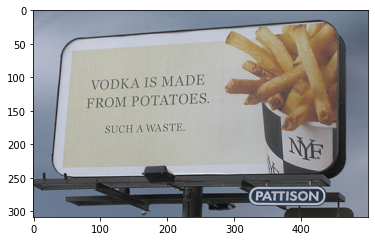

In [4]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/billboard.jpg'


image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p {download_dir} && rm -rf {download_dir}/*
!wget -q -P {download_dir} {IMAGE_URL}
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Run CRAFT on the above test image:

In [5]:
!cd {project_name} && python test.py --trained_model=../{pretrained_model} --test_folder=/content/images

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (../craft_mlt_25k.p

Now, visualize the result:

In [6]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread(join(project_name, 'result','res_'+image_file_name)))

FileNotFoundError: ignored

<Figure size 1440x1872 with 0 Axes>